<h1 align='center'> COMP2550/COMP4450/COMP6445 - Advanced Computing R&D Methods</h1>
<h1 align='center'> Assignment 2 - Machine Learning</h1>

## General Information

|**Maximum Marks**         |**100**
|--------------------------|--------
| **Weight** | **16% of the Total Course Grade**
| **Submission deadline** | **11:59PM, Tuesday, May 5**
| **Submission mode** | **.ipynb file + .csv file, via Wattle**
| **Penalty** | **100% after the deadline**
  

## Student Information

<br/>

<span style="color:red">
    
**University ID :** u6211458

**Name:** Renhao(Cameron) Tan

</span>

## Submission

You will need to submit a `.zip` file with your uid (e.g. `u1234567.zip`) containing:
* This completed jupyter notebook file (.ipynb) to Wattle with the information above filled in. The file name should be changed to your UID, e.g. `u1234567.ipynb`.
* An additional `.csv` file for Task 3, which will be specified in the last part of Task 3.

No late submission is allowed. You will get 0 marks for late submissions unless there is a reasonable excuse discussed with the course convenor or tutors before the deadline.


In [1]:
# YOU CAN ADD MORE PACKAGES HERE IF NECESSARY
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

plt.style.use("seaborn")

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

## Task 1 Regression (35 pts)

### Task 1.0 General Information and The Dataset

The task is to build three different regression models which models the data above. The dataset file `task1_data.csv` is provided **on Wattle**. The response variable `y` is generated by an unknown polynomial function with regards to predictor `x` along with some unknown noise. The data has been visualized in the next cell below.

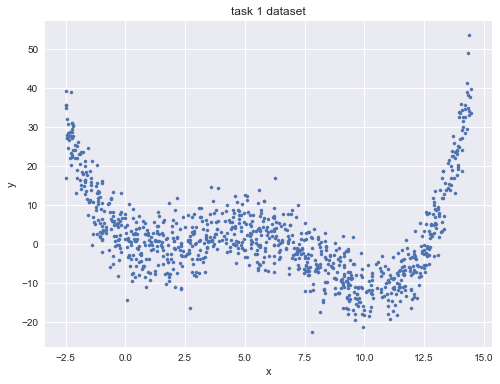

In [2]:
# DO NOT MODIFY THIS CELL!
# load data from the dataset file
t1_dataset = np.loadtxt("task1_dataset.csv", delimiter=",")
train_x, test_x, train_y, test_y = train_test_split(t1_dataset[0, :], t1_dataset[1, :], test_size = 0.15, random_state = 222)

# plot the dataset 
plt.figure(figsize = [8, 6])
plt.scatter(t1_dataset[0, :], t1_dataset[1, :], s = 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("task 1 dataset")
plt.show()

You are allowed to use any regression model in the `sklearn` package. Useful APIs can be found at https://scikit-learn.org/stable/modules/classes.html. After you generate and train the regression models, you should visualize each model. Sample visualisation is shown as below. **Note: for each of your models, you should attempt to tune the hyperparameter(s) to get a better/optimal result.** You may need to do several experiments to determine the best choice of hyperparameters. Provide some documetation of your experiments through plots and comments.

<img src="./task1.png">

### Task 1.1 Regression Model Implementation & Visualisation (21 pts)

**Note 1: You can do some preprocessing on the train set `train_x`. In this case, you should adopt the same preprocessing on `test_x` as well.**

**Note 2: You should train your model on the train set `train_x` and evaluate your model on the test set `test_x`.**

**Polynomial regression model implementation (3 pts):**

Linear regression is commonly regarded as the simplest regression model. It maps the independent variable $x$ to the dependent variable $y$ via a linear function: $y = x\beta + \varepsilon$. Therefore, simple linear regression only models a linear relationship between the variables $x$ and $y$.

Polynomial regression can considered as an advanced version of linear regression, which uses an n-th order polynomial equation instead of a linear equation, i.e. $y = \beta_0 + \beta_1x+\beta_2x^2 + ... + \beta_nx^n$. In other words, linear regression is a special case of n-th order polynomial regression when n = 1. You may refer to https://en.wikipedia.org/wiki/Polynomial_regression to learn more about polynomial regression.

Now, it's your turn to implement a polynomial regressor, fitting an n-th order polynomial as one model with n being one of the hyperparameters. You need to determine an optimal value of n, i.e. the n-th polynomial with best performance.


In [3]:
train_x_1 = train_x.copy()
train_y_1 = train_y.copy()
test_x_1 = test_x.copy()
test_y_1 = test_y.copy()
# ****** Your implementation 1 below ******
print('Order   Train Score       Test Score')
# Implement a polynomial regression model from order 2 to 9
for i in range(2, 10):
    model_1 = make_pipeline(PolynomialFeatures(i), LinearRegression())
    model_1.fit(train_x_1.reshape(-1, 1), train_y_1)
    # Print training score and testing score on screen
    print(' ', i, '  ', model_1.score(train_x_1.reshape(-1, 1), train_y_1), '  ', model_1.score(test_x_1.reshape(-1, 1), test_y_1))

Order   Train Score       Test Score
  2    0.391169857707    0.46920884447
  3    0.443430323376    0.501711053859
  4    0.819018525613    0.85715262861
  5    0.81920729831    0.856006707773
  6    0.819834437441    0.855881622305
  7    0.819919638191    0.85531604339
  8    0.820072395576    0.854895862908
  9    0.820112970206    0.855147429142


**Justify why you choose the value of n above. (6 pts)**

You need to plot your best model below to show it fits the dataset well. You will also need to briefly explain why your value for n is the best value. Provide more plots as necessary.

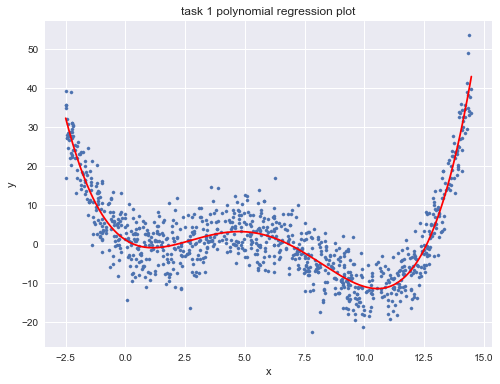

In [4]:
# plot the dataset 
plt.figure(figsize = [8, 6])
plt.scatter(t1_dataset[0, :], t1_dataset[1, :], s = 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("task 1 polynomial regression plot")

# ****** Your polynomial regression plot below ******
model_1 = make_pipeline(PolynomialFeatures(4), LinearRegression())
model_1.fit(train_x_1.reshape(-1, 1), train_y_1)
# Combine train set and test set of x into one array, then sort the values of x before plotting
x = np.concatenate((train_x_1, test_x_1))
x = np.sort(x)
y_pred = model_1.predict(x.reshape(-1, 1))
plt.plot(x, y_pred, color = 'red')
plt.show()

*Your discussion here*

According to the scores of n-th polynomial regression model on training set and testing set above, we can see that the training score rises as the polynomial order rises. However, the score of testing set rises from order 2 to 4, and then fluctuates from 5 to 9. This means that the precision of regression model on training set will increase when the order of polynomial increases, but that on testing set would be pretty much the same when the polynomial order is greater than or equal to 4. In this case, we can consider that the model implemented above would reach its maximum precision at order 4. Thus, a 4th-order polynomial regression model is the best choice to implement.

<br/>

---
Next, generate two other regressors below and compare their performances with the polynomial regressor above. You will find different regression models may achieve distinct results. 

Your regression **model 2 implementation (3 pts)**:

In [26]:
train_x_2 = train_x.copy()
train_y_2 = train_y.copy()
test_x_2 = test_x.copy()
test_y_2 = test_y.copy()
# ****** Your implementation 2 below ******
# Implement a polynomial regression model from order 2 to 9
print('min_samples = None:\n') # Observations of min_samples is None
print('Order   Train Score        Test Score')
for i in range(2, 10):
    model_2 = make_pipeline(PolynomialFeatures(i), linear_model.RANSACRegressor(random_state = 0, stop_score = 0.9))
    model_2.fit(train_x_2.reshape(-1, 1), train_y_2)
    print(' ', i, '  ', model_2.score(train_x_2.reshape(-1, 1), train_y_2), '   ', model_2.score(test_x_2.reshape(-1, 1), test_y_2))
print('\nmin_samples = 50:\n') # Observations of min_samples is 20
print('Order   Train Score        Test Score')
for i in range(2, 10):
    model_2 = make_pipeline(PolynomialFeatures(i), linear_model.RANSACRegressor(min_samples = 50, random_state = 0, stop_score = 0.9))
    model_2.fit(train_x_2.reshape(-1, 1), train_y_2)
    print(' ', i, '  ', model_2.score(train_x_2.reshape(-1, 1), train_y_2), '   ', model_2.score(test_x_2.reshape(-1, 1), test_y_2))

min_samples = None:

Order   Train Score        Test Score
  2    -0.144351473046     -0.178818603185
  3    0.134779304996     0.303684964954
  4    0.743862141626     0.797646342442
  5    0.740311821144     0.793099826306
  6    -0.963133554803     -1.31365204315
  7    0.791089225899     0.811390601493
  8    0.600011238881     0.506769991321
  9    0.729801786716     0.745370660035

min_samples = 50:

Order   Train Score        Test Score
  2    0.0690117952625     0.0642527263972
  3    0.0920432088704     0.0881531634376
  4    0.816362638345     0.852332803795
  5    0.811637101569     0.833046552442
  6    0.812322043395     0.849522391265
  7    0.81116844228     0.828824211769
  8    0.811375152382     0.843810567364
  9    0.810165180039     0.847330058125


Your regression **model 2 plot and justification (3 pts)**:

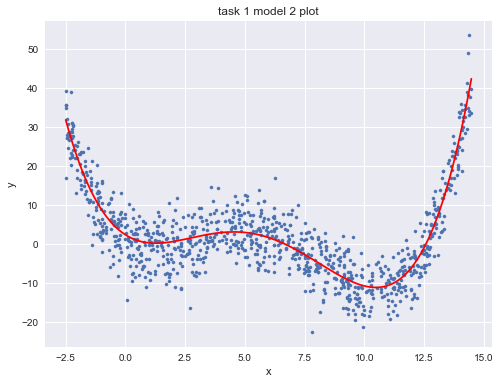

In [29]:
# plot the dataset 
plt.figure(figsize = [8, 6])
plt.scatter(t1_dataset[0, :], t1_dataset[1, :], s = 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("task 1 model 2 plot")

# ****** Your plot 2 below ******
model_2 = make_pipeline(PolynomialFeatures(4), linear_model.RANSACRegressor(min_samples = 50))
model_2.fit(train_x_2.reshape(-1, 1), train_y_2)
x = np.concatenate((train_x_2, test_x_2))
x = np.sort(x)
y_pred = model_2.predict(x.reshape(-1, 1))
plt.plot(x, y_pred, color = 'red')
plt.show()

If you adjust any hyperparameter(s) for the model above, please justify. You should **explain what the hyperparameter(s) mean and how different values influence the resulting model**. 

*Your explanation here*

The regression model for model 2 is based on RANSACRegressor, it stands for random sample consensus algorithm. The most descrepancy between model 1 and 2 is that the second model analyzes the sample randomly and iteratively. The hyperparameter 'min_samples' is the minimum samples chosen from the original data set. If this hyperparameter is not set(min_samples = None by default), then the standard deviation of the scores of the regression model would be large. Assigning a relatively large value to 'min_samples' can make the model more stable.

<br/>

---
Your regression **model 3 implementation (3 pts)**:

In [32]:
train_x_3 = train_x.copy()
train_y_3 = train_y.copy()
test_x_3 = test_x.copy()
test_y_3 = test_y.copy()
# ****** Your implementation 3 below ******
print('Order   Train Score       Test Score')
# Implement a polynomial regression model from order 2 to 9
for i in range(2, 10):
    model_3 = make_pipeline(PolynomialFeatures(i), linear_model.HuberRegressor())
    model_3.fit(train_x_3.reshape(-1, 1), train_y_3)
    print(' ', i, '  ', model_3.score(train_x_3.reshape(-1, 1), train_y_3), '  ', model_3.score(test_x_3.reshape(-1, 1), test_y_3))

Order   Train Score       Test Score
  2    0.366683731189    0.427647033777
  3    0.431948955356    0.480441656919
  4    0.818784605402    0.855807284197
  5    0.462624707282    0.470781268099
  6    0.475289164517    0.499351556894
  7    0.464761312384    0.49100509173
  8    0.471533844138    0.493773310274
  9    0.42255255031    0.454226418719


Your regression **model 3 plot and justification (3 pts)**:

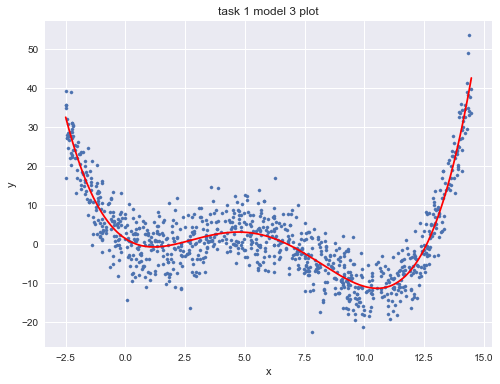

In [38]:
# plot the dataset 
plt.figure(figsize = [8, 6])
plt.scatter(t1_dataset[0, :], t1_dataset[1, :], s = 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("task 1 model 3 plot")

# ****** Your plot 3 below ******
model_3 = make_pipeline(PolynomialFeatures(4), linear_model.HuberRegressor())
model_3.fit(train_x_3.reshape(-1, 1), train_y_3)
x = np.concatenate((train_x_3, test_x_3))
x = np.sort(x)
y_pred = model_3.predict(x.reshape(-1, 1))
plt.plot(x, y_pred, color = 'red')
plt.show()

If you adjust any hyperparameter(s) for the model above, please justify. You should **explain what the hyperparameter(s) mean and how different values influence the resulting model**. 

*Your explanation here*

The third polynomial regression model is based on Huber Regressor. Unlike model 2 above, model 3 does not analyze the sample randomly. Compared to model 1, model 3 is less affected by outliers in the dataset because of optimizing square loss and absolute loss for the training sample while choosing the most precise order for the polynomial regression. 

<br/>

---
### Task 1.2 Regression Evaluation (5 pts)

The three regression models above have varying levels of performance, some models will clearly perform better than others. In the lecture, you will find that some **errors**, e.g. sum of the squared error, are used as the loss function for regression models. Meanwhile, these error functions can also be used to measure the performance of a regression model.

In this task, you need to complete a function that measures the performances of your models above. The function should be able to calculate and return the **root mean squared error (RMSE)**. 

Root mean squared error function is defined as:

$$RMSE = \sqrt{\frac{1}{m}\sum^{m}_{i=1}(y_{i}-\hat{y}_{i})^{2}}$$

where $y_{i}$ is the predictions of your model and $\hat{y}_{i}$ is the ground truth. More information can be found at https://en.wikipedia.org/wiki/Root-mean-square_deviation.

**Note 1: You can only use `NumPy` and `Python Standard Library` for this task!**

**Note 2: If you have adopted preprocessing methods in task 1.1 for training purpose, then you should also use the same methods on `test_x_1`, `test_x_2`, `test_x_3` as well. Otherwise, `test_x_n = test_x.reshape(-1,1)`.**

In [42]:
def RMSE(pred_y, true_y):
    # ****** Your implementation here ******
    return np.sqrt(np.mean((pred_y - true_y)**2))

In [43]:
# Now we can test your function
# Make sure there is no error raising from this cell
test_x_1 = test_x.reshape(-1, 1)
test_x_2 = test_x.reshape(-1, 1)
test_x_3 = test_x.reshape(-1, 1)

print("RMSE of the first model:", RMSE(model_1.predict(test_x_1), test_y_1), "\n")
print("RMSE of the second model:", RMSE(model_2.predict(test_x_2), test_y_2), "\n")
print("RMSE of the third model:", RMSE(model_3.predict(test_x_3), test_y_3), "\n")

RMSE of the first model: 4.44517197583 

RMSE of the second model: 4.57869576393 

RMSE of the third model: 4.46605535813 



---
### Task 1.3 Regression Analysis (9 pts)

In the previous tasks, you have generated, trained and evaluated three different regression models. You will now need to explain **why each model performs differently and why one may be better than the others**. You should explain how each of the models you have used work, along with their strengths and weaknesses. To answer these questions you should do some research into how your particular class of Regression model works along with specific details of their workings in scikit-learn.

If you are not familiar with markdown syntax, you may refer to https://sourceforge.net/p/jupiter/wiki/markdown_syntax/#md_ex_lists. Please make your answers neat and clear to read. You can use several bullet lists to provide answers concerning various points.

**Note: each question should be answered within 250 words**

#### 1.3.1 How does your second model work? Briefly explain (3pts)

*Your answer here*

The RMSE of the second model is 4.58, and the mean score of model 2 for 20 trials is 0.853. For RANSAC Regressor, the base estimator is Linear Regression by default, and the model analyzes the training data randomly and iteratively. So the score of the 4th order polynomial regression is very close to the score of model 1. However, the hyperparameter 'min_samples' could possibly stablize the scores for polynomial regression at each order shown previously. If this hyperparameter is not modified, then the scores for polynomial regression at some orders will be negative. Personally speaking, assigning a relatively large value(from 20 to 80) to 'min_samples' can slightly make the model perform better and decrease the standard deviation of the scores on polynomial regression at other order.

#### 1.3.2 How does your third model work? Briefly explain (3pts)

*Your answer here*

The RMSE of the third model is 4.47, and the score is 0.856. In the process of training regression model, Huber Regressor optimizes square loss and absolute loss to reduce the impact of outliers on regression model. According to the plot, RMSE and model score, the performance of this model is very close to that of model 1. However, besides the 4th order polynomial regression, the scores of regression at other order are not at the same level with the 4th order model. In my opinion, the reason why the other order regression models are not as good as 4th order is that Huber Regressor decrease the weight of outliers in training process. Meanwhile, these outliers can in fact help the model to predict a more precise value but are assigned with a low weight. Consequently, such an action makes the scores lower than the other 2 regression models at an order except 4.

#### 1.3.3 Which one of the three models performs the best? Explain why this model performs better than the others (3 pts)

*Your answer here*

The 3 plots of the 3 models are not significantly different from each other. According to the RMSE and scores of these 3 models, model 1 performs slightly better than the other 2 models. When setting the hyperparmeter 'min_samples' to 50 in model 2, its performance is close to that of model 1. Like I written above, model 3 does not perform so well in regression at an order except 4 since Huber Regressor assigns low weight values to the outliers in training sample. Besides that, the performance of the 3 models are similar with each other. The comparison of scores of the models is shown below.

In [25]:
model_1 = make_pipeline(PolynomialFeatures(4), LinearRegression())
model_1.fit(train_x.reshape(-1, 1), train_y)
score_2 = []
for i in range(0, 20):
    model_2 = make_pipeline(PolynomialFeatures(4), linear_model.RANSACRegressor(min_samples = 50))
    model_2.fit(train_x.reshape(-1, 1), train_y)
    score_2.append(model_2.score(test_x.reshape(-1, 1), test_y))
model_3 = make_pipeline(PolynomialFeatures(4), linear_model.HuberRegressor())
model_3.fit(train_x.reshape(-1, 1), train_y)
print('mean score for model 1:', model_1.score(test_x.reshape(-1, 1), test_y), '\n')
print('mean score for model 2:', np.mean(score_2), '\n')
print('mean score for model 3:', model_3.score(test_x.reshape(-1, 1), test_y))

mean score for model 1: 0.85715262861 

mean score for model 2: 0.852546527448 

mean score for model 3: 0.855807284197


---
## Task 2 Classification (35 pts)

### Task 2.0 General Information and The Dataset

Classification is another important task in Machine Learning area. It identifies to which of a set of categories a new observation belongs, on the basis of a training set of data. In this task, you are required to build several classification models to cope with a dataset of wine qualities.

Prior to implementing a classification model, let's have a quick view of the dataset. There are totally 4898 samples with corresponding features. Each sample has 11 features in `df_features` and their types are stored in `df_target`. You can match the features and types by their index

In [44]:
# DO NOT MOFIDY THIS CELL!
df_wine = pd.read_csv("task2_dataset.csv", sep = ";")
df_features = df_wine.drop(["quality"], axis = 1)
df_target = df_wine[["quality"]]
df_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000


Next, let's split this dataset into two parts, i.e. the train set and the test set. 90% of the original dataset will contribute to the train set and rest of them will form the test set. Thus, there are 4408 rows in the train set and 490 rows in the test set, which have all been shuffled.

In [45]:
# DO NOT MODIFT THIS CELL!
train_features, test_features, train_target, test_target = train_test_split(df_features, df_target, test_size = 0.1, random_state = 222)
print("Number of samples in train set:", len(train_target))
print("Number of samples in test set:", len(test_target))

Number of samples in train set: 4408
Number of samples in test set: 490


Now, its your turn to **generate three different classifiers**.  You should train your model on `train_features` and `train_target` while evaluating your model on `test_features` and `test_target`. Specifically, we want you to generate a decision tree classifier among the three classifiers. There are several parameters in the decision tree classifier that you may want to adjust. You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn.tree.DecisionTreeClassifier. 

Hint 1: You may attempt different values of parameters to build a better/optimal classifier. To test the performance, you can run the next cell which has an in-built function called `model.score()`.

Hint 2: For each model that you generate, you should explain the parameters that you modify. Provide plots when necessary.

### Task 2.1 Decision Tree Classifier (12 pts):

**Note: If you adopted preprocessing on `train_features`, those preprocessing should also be adopted in `test_features`.**

**Generate and train a decision tree model. (5 pts)**

In [113]:
train_features_1 = train_features.copy()
train_target_1 = train_target.copy()
test_features_1 = test_features.copy()
test_target_1 = test_target.copy()
# ****** Your Implementation Here ******
model_1 = DecisionTreeClassifier(max_depth = 20)
model_1.fit(train_features_1, train_target_1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [114]:
# evaluate your model performance
print("Your model's mean accuracy on test set:", model_1.score(test_features_1, test_target_1))

Your model's mean accuracy on test set: 0.630612244898


There are quite a lot of parameters for the decision tree classifier. During your implementation and evaluation, you may adjust some of the parameters to reach a better performance (e.g. score > 0.66). Now you need to **explain what your modified parameters mean and how you determine their values (7 pts)**. 

*Your discussion here*

The hyperparameters I adjusted in Decision Tree Classifier is 'max_depth'. The hyperparameter 'max_depth' represents the maximum depth of the decision tree. A relatively higher 'max_depth' can help the model perform better. However, the higher 'max_depth' is, the model would be more likely to overfit the training data. A line plot of how 'max_depth' affect the score of classification model is shown below. 

Another hyperparameter I explored is 'max_features', this hyperparameter stands for the number of features to consider for the best split. In the second line graph shown below, we can see that the value of this hyperparameter does not affect much on the score of the model. In this case, all features are supposed to consider in the training phase.

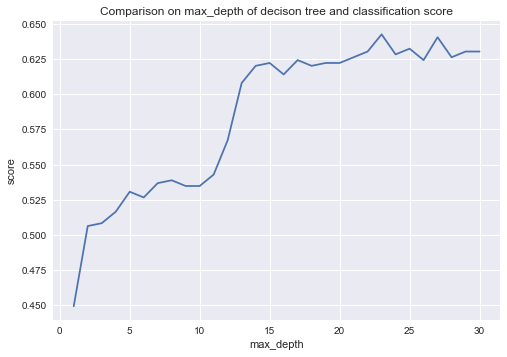

In [122]:
# you can add more cells if plots are necessary in your explanations.
fig = plt.figure()
depth = []
scores = []
for i in range(1, 31):
    model_1 = DecisionTreeClassifier(max_depth = i, random_state = 0)
    model_1.fit(train_features_1, train_target_1)
    depth.append(i)
    scores.append(model_1.score(test_features_1, test_target_1))
plt.plot(depth, scores)
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Comparison on max_depth of decison tree and classification score')
plt.show()

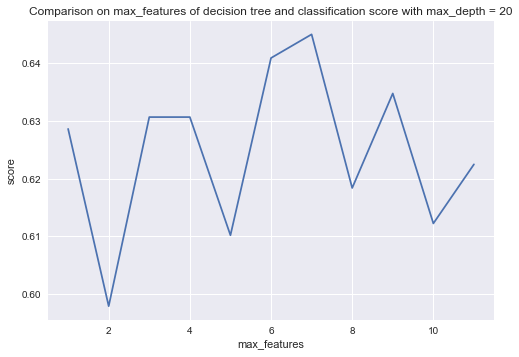

In [123]:
fig = plt.figure()
features = []
scores = []
for i in range(1, 12):
    model_1 = DecisionTreeClassifier(max_depth = 20, max_features = i, random_state = 0)
    model_1.fit(train_features_1, train_target_1)
    features.append(i)
    scores.append(model_1.score(test_features_1, test_target_1))
plt.plot(features, scores)
plt.xlabel('max_features')
plt.ylabel('score')
plt.title('Comparison on max_features of decision tree and classification score with max_depth = 20')
plt.show()

<br/>

---
### Task 2.2 Other Classifiers (12 pts)

Besides decision tree classifier, there are many other powerful classifiers that you can choose to solve the classification task. Now you are required to build another two classifiers and test their performances.

Your classification **model 2 implementation (3 pts):**

In [183]:
train_features_2 = train_features.copy()
train_target_2 = train_target.copy()
test_features_2 = test_features.copy()
test_target_2 = test_target.copy()
# ****** Your Implementation Here ******
model_2 = RandomForestClassifier(max_depth = 20, n_estimators = 80)
model_2 = model_2.fit(train_features_2, train_target_2)


In [184]:
# evaluate your model performance
print("Your model's mean accuracy on test set:", model_2.score(test_features_2, test_target_2))

Your model's mean accuracy on test set: 0.708163265306


If you adjust any hyperparameter(s) for the model above, please justify. You should **explain what the hyperparameter(s) mean and how different values may influence the resulting model (3 pts)**. 

*Your explanation here*

The model in this task is based on Random Forest Classifier. The hyperparameters I changed are 'max_depth' and 'n_estimators'. Random Forest Classifier is based on a number of Decision Tree Classifiers on various of sub-samples, and then calculating the mean of the classifiers to improve accuracy and control ovrtfitting. It is an enhanced version of Decision Tree Classifier. 

Just like Decision Tree Classifier, the hyperparameter 'max_depth' is the maximum depth of each decision tree. In the first and second plot below, we can see that how 'max_depth' and 'max_features' affect the score is similar with those on Decision Tree Classifier. 

The hyperparameter 'n_estimators' stands for the number of decision trees in this classifier. According to the third plot below, it indicates that the score of the model will mostly rise as 'n_estimators' increases. However, the more dicision trees in the forest, the longer computation process would take. In this case, we can see that the score will not significantly increase when 'n_estimators' is greater than 80. Hence, we could set 'n_estimators' to 80 to train the classification model.

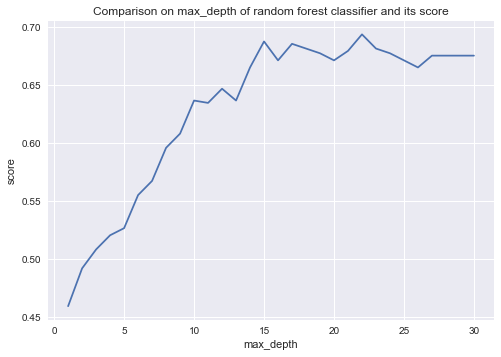

In [126]:
fig = plt.figure()
depth = []
scores = []
for i in range(1, 31):
    model_2 = RandomForestClassifier(max_depth = i, random_state = 0)
    model_2.fit(train_features_2, train_target_2)
    depth.append(i)
    scores.append(model_2.score(test_features_2, test_target_2))
plt.plot(depth, scores)
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Comparison on max_depth of random forest classifier and its score')
plt.show()

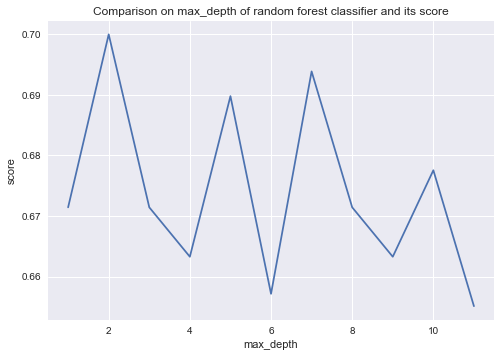

In [129]:
fig = plt.figure()
features = []
scores = []
for i in range(1, 12):
    model_2 = RandomForestClassifier(max_depth = 20, max_features = i, random_state = 0)
    model_2.fit(train_features_2, train_target_2)
    features.append(i)
    scores.append(model_2.score(test_features_2, test_target_2))
plt.plot(features, scores)
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Comparison on max_depth of random forest classifier and its score')
plt.show()

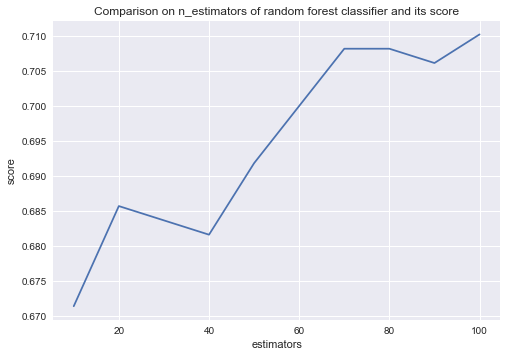

In [177]:
fig = plt.figure()
estimator = []
scores = []
i = 10
while i <= 100:
    model_2 = RandomForestClassifier(max_depth = 20, n_estimators = i, random_state = 0)
    model_2.fit(train_features_2, train_target_2)
    estimator.append(i)
    scores.append(model_2.score(test_features_2, test_target_2))
    i = i + 10
plt.plot(estimator, scores)
plt.xlabel('estimators')
plt.ylabel('score')
plt.title('Comparison on n_estimators of random forest classifier and its score')
plt.show()

<br/>

---
Your classification **model 3 implementation (3 pts):**

In [187]:
train_features_3 = train_features.copy()
train_target_3 = train_target.copy()
test_features_3 = test_features.copy()
test_target_3 = test_target.copy()
# ****** Your Implementation Here ******
model_3 = KNeighborsClassifier(n_neighbors = 11, weights = 'distance')
model_3 = model_3.fit(train_features_3, train_target_3)


In [188]:
# evaluate your model performance
print("Your model's mean accuracy on test set:", model_3.score(test_features_3, test_target_3))

Your model's mean accuracy on test set: 0.642857142857


If you adjust any hyperparameter(s) for the model above, please justify. You should **explain what the hyperparameter(s) mean and how different values may influence the resulting model (3 pts)**. 

*Your explanation here*

The third model is based on k neighbors classification. The hyperparameters I changed are 'weights' and 'n_neighbors'. Hyperparameter 'weight' is the weight function on the closest n neighbors during classification. The default option 'uniform' means the closest n neighbors of a query point will have the same weight, while the other option 'distance' is a weight function by distance. The distance function will assign a higher weight to a closer sample point to the query point. The comparison between these 2 weight functions is shown below. Obviously, the distribution of weight by distance can make the model perform better than that with uniform weight function. 

The other hyperparameter 'n_neighbors' is the how many nearest neighbors will the model consider during classification. In most cases, an odd number of 'n_neighbors' is likely to be better than an even 'n_neighbors', since an even number of 'n_neighbors' is more likely to trigger a tie during classification. In this case, I used all odd numbers between 5 and 15 to compare their scores with each other, and the highest score occurs when 'n_neighbors' is 11.

In [190]:
i = 5
print('weights = uniform:\n')
print('neighbors      score')
while i <= 15:
    model_3 = KNeighborsClassifier(n_neighbors = i)
    model_3 = model_3.fit(train_features_3, train_target_3)
    print('   ', i, '    ', model_3.score(test_features_3, test_target_3))
    i = i + 2
print('\nweights = distance:\n')
print('neighbors      score')
i = 5
while i <= 15:
    model_3 = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    model_3 = model_3.fit(train_features_3, train_target_3)
    print('   ', i, '    ', model_3.score(test_features_3, test_target_3))
    i = i + 2

weights = uniform:

neighbors      score
    5      0.491836734694
    7      0.455102040816
    9      0.461224489796
    11      0.481632653061
    13      0.457142857143
    15      0.459183673469

weights = distance:

neighbors      score
    5      0.636734693878
    7      0.622448979592
    9      0.622448979592
    11      0.642857142857
    13      0.636734693878
    15      0.640816326531


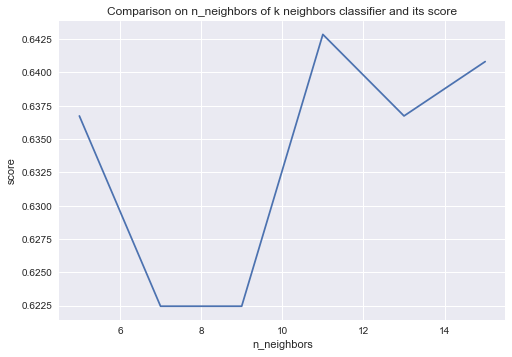

In [143]:
fig = plt.figure()
neighbor = []
scores = []
i = 5
while i <= 15:
    model_3 = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    model_3.fit(train_features_3, train_target_3)
    neighbor.append(i)
    scores.append(model_3.score(test_features_3, test_target_3))
    i = i + 2
plt.plot(neighbor, scores)
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.title('Comparison on n_neighbors of k neighbors classifier and its score')
plt.show()

<br/>

---
### Task 2.3 Classification Model Analysis (11 pts)

**Note: each question should be answered within 250 words**

#### 2.3.1 Which classifier above performs the best? Briefly explain why it outperforms the other two models. (6 pts)

*Your answer here*

According to the (mean) scores of the 3 classification models, the second(Random Forest Classifier) performs better than the other 2 models. Random Forest Classifier fits multiple decision trees to train its model, so its predicition is better than a single Decision Tree Classifier. For knn classification, personally speaking, even though the distance weight function is applied, there might be some outliers from each class have a closer distance to training samples from other classes rather than samples from its true class, which affect the model perform not as well as Random Forest Classifier.

In [185]:
score_1 = []
score_2 = []
for i in range(0, 20):
    model_1 = DecisionTreeClassifier(max_depth = 20)
    model_2 = RandomForestClassifier(max_depth = 20, n_estimators = 80)
    model_1 = model_1.fit(train_features.copy(), train_target.copy())
    model_2 = model_2.fit(train_features.copy(), train_target.copy())
    score_1.append(model_1.score(test_features.copy(), test_target.copy()))
    score_2.append(model_2.score(test_features.copy(), test_target.copy()))
model_3 = KNeighborsClassifier(n_neighbors = 11, weights = 'distance')
model_3 = model_3.fit(train_features.copy(), train_target.copy())
print('mean score for model 1:', np.mean(score_1), '\n')
print('mean score for model 2:', np.mean(score_2), '\n')
print('mean score for model 3:', model_3.score(test_features.copy(), test_target.copy()))

mean score for model 1: 0.629387755102 

mean score for model 2: 0.702653061224 

mean score for model 3: 0.642857142857


#### 2.3.2 Besides the mean accuracy, what other metrics can be used to measure the classification performance? Briefly explain them. (5 pts)

*Your answer here*

1. Confusion matrix: Confusion matrix has 4 entries, which are true positive(TP), false positive(FP), false negative(FN) and true negative(TN). These 4 entries records how many data in each class has been classified correctly or wrong. Most of the classification performance metrics is based on these 4 values to generate a result.

2. Precision: Precision is a measurement on the sample has been classified in positive classes. It represents a proportion of how many data points in the positive classes have been correctly classified to be positive.(Precison = TP / (TP + FP) )

3. Recall: Recall is the proportion of how many data points which are supposed to be positive has been correctly classified to the positive classes.(Recall = TP / (TP + FN) )

4. F1 score: F1 score is the harmonic mean of precision and recall, which provides an evaluation of the model on both aspects of precision and recall. (F1 = 2 * Precision * Recall / (Precision + Recall) )

5. Log loss: Log loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1.The smaller log loss is, the better classification model performs.

Reference: http://wiki.fast.ai/index.php/Log_Loss

---
## Task 3 #DebateNight Revisited (30 pts)

We have taken a look at the #DebateNight dataset during the first lab in R. We will now revisit this dataset and build a regression model in order to predict the botscore of various users. 

### Task 3.1 Prediction (25 pts)

Starting from the dataset containing a sample of 100k users from #DebateNight called `sample_users_100k.csv`, your task is to predict as accurately as possible the <i>botness</i> feature using a regression model. 

The evaluation for this task will be based upon how well your model performs on the provided `testing_set_features.csv` along with how in-depth you have explored various techniques to improve performance. You should aim for a RMSE value of around 0.1.

A number of things you can try to explore are: 
<ul>
    <li> <b>Oversampling, undersampling</b> - applying strategies to rebalance the dataset to improve the prediction on the minority class (bots)
    <li> <b>Using alternative models from various libraries</b> - within sklearn itself there are a large variety of models to explore, some of which will perform better than others
    <li> <b>Feature preprocessing</b> - applying various transformations to to data so that the model performs better. For example taking the logs of of features to correct skewed skewed distributions of data
    <li> <b>Data imputation</b> - filling in missing data using knowledge of all the other data, below we have chosen to set all the NaN values to 0
    <li> <b>Using more or fewer features</b> - below we have only selected the features that are numerical, you can explore various ways to transform any other features into usable formats
</ul>        
        
Below we have fitted a basic least squares linear regression model using 80% of `sample_users_100k.csv` as our training set and evaluated the model on the other 20% of the data.

In [2]:
# DO NOT MODIFY THIS CELL!
df_debatenight = pd.read_csv("sample_users_100k.csv", sep='\t')

# Convert values and types of botscore - what do each of these values mean?
df_debatenight[df_debatenight['botscore'] == 'deleted'] = 0
df_debatenight[df_debatenight['botscore'] == 'protected'] = 0
df_debatenight[df_debatenight['botscore'] == 'suspended'] = 0
df_debatenight['botscore'] = df_debatenight['botscore'].astype(float)
df_debatenight[df_debatenight['botscore'] < 0] = 0

# Now you can refer to the data frame shown below
df_debatenight.head()

,user_id,user_name,collectionDate,displayName,utcOffset,statusesCount,link,image,twitterTimeZone,summary,...,location.objectType,botscore,mcsize,influence,influence_percentile,tweetsCount,retweetsCount,bias_polarity,bias_engagement,sum_betweenness
0,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0,0.00,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
1,395167525.0,____PantheR,2016-09-27 02:27:43,PantheR,-25200.0,111503.0,http://www.twitter.com/____PantheR,https://pbs.twimg.com/profile_images/780247457...,Pacific Time (US & Canada),A dude with a phone trying to be a decent huma...,...,place,0.52,151.5,12.65409,0.998083,2.0,4.0,NaN,NaN,103.0
2,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0,0.00,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
3,175921808.0,hobeauky,2016-09-27 02:01:55,Holly Hendricks,NaN,33.0,http://www.twitter.com/hobeauky,https://pbs.twimg.com/profile_images/739106132...,NaN,NaN,...,NaN,0.29,1.0,1.00000,0.116420,1.0,0.0,NaN,NaN,NaN
4,308628816.0,Anne_Coates1,2016-09-27 02:44:48,Anne Coates,3600.0,29477.0,http://www.twitter.com/Anne_Coates1,https://pbs.twimg.com/profile_images/595317693...,London,Freelance editor and author of seven non-ficti...,...,place,0.26,1.0,1.00000,0.116420,1.0,0.0,NaN,NaN,NaN


In [3]:
# DO NOT MODIFY THIS CELL!
np.random.seed(222)

# Select all the numeric columns and fill in the NA values
df_debatenight_sample = df_debatenight.select_dtypes(include=['float64', 'float32', 'float16'])
df_debatenight_sample = df_debatenight_sample.fillna(0)

# Select the features and target
X = df_debatenight_sample.drop(["botscore", 'user_id'], axis=1)
Y = df_debatenight_sample['botscore']

# Choose our training data to be 80% of our dataset and the testing data to be the other 20%
samples = np.random.choice(np.arange(100000), 80000, replace=False, )

X_train = X.loc[X.index.isin(samples)]
Y_train = Y.loc[Y.index.isin(samples)]

X_test = X.loc[~X.index.isin(samples)]
Y_test = Y.loc[~Y.index.isin(samples)]

In [4]:
# DO NOT MODIFY THIS CELL!
regression_model = linear_model.LinearRegression()
regression_model.fit(X_train, Y_train)
predictions = regression_model.predict(X_test)
print("RMSE of linear regression model: ", np.sqrt(sklearn.metrics.mean_squared_error(predictions, Y_test)))

RMSE of linear regression model:  0.136350101138


After training on 80% of the dataset, the simple linear regression model achieves a RMSE value of around 0.1363. 

---

Now you need to train your model on the `sample_users_100k.csv` dataset and predict the `botscore` of `testing_set_features.csv`. 

The predictions should be stored in a .csv file named with your uid, e.g. "u1234567_predictions.csv". The prediction file should have only two columns, respectively `user_id` and `botscore`, matching the users in `testing_set_features.csv`.

In [11]:
# ****** Your Implementation Here ******
# Load data from csv
df_debatenight = pd.read_csv("sample_users_100k.csv", sep='\t')
test_set = pd.read_csv('testing_set_features.csv', sep = '\t')
# Same preprocessing methods on botscore as those in the example above
df_debatenight[df_debatenight['botscore'] == 'deleted'] = 0
df_debatenight[df_debatenight['botscore'] == 'protected'] = 0
df_debatenight[df_debatenight['botscore'] == 'suspended'] = 0
df_debatenight['botscore'] = df_debatenight['botscore'].astype(float)
df_debatenight[df_debatenight['botscore'] < 0] = 0
# Store the user id from test set
test_user_id = test_set['user_id'].copy()
# Transform the values in column 'verified' and 'summary' into numerical
df_debatenight['verified'] = df_debatenight['verified'].replace({True: 1, False: 0})
test_set['verified'] = test_set['verified'].replace({True: 1, False: 0})
# If a user's summary is not empty, replace the summary value with 1
# Otherwise, replace with 0
df_debatenight['summary'] = df_debatenight['summary'].apply(lambda x: 1 if type(x) == str else 0)
test_set['summary'] = test_set['summary'].apply(lambda x: 1 if type(x) == str else 0)
# Transform the data type of values in 'verified' and 'summary' to float
df_debatenight['verified'] = df_debatenight['verified'].astype(float)
df_debatenight['summary'] = df_debatenight['summary'].astype(float)
test_set['verified'] = test_set['verified'].astype(float)
test_set['summary'] = test_set['summary'].astype(float)
# Select the columns whose data type is float and fill 0 into NaN
df_debatenight = df_debatenight.select_dtypes(include=['float64', 'float32', 'float16'])
df_debatenight = df_debatenight.fillna(0)
test_set = test_set.select_dtypes(include=['float64', 'float32', 'float16'])
test_set = test_set.fillna(0)
x = df_debatenight.drop(['user_id', 'botscore'], axis = 1)
y = df_debatenight['botscore']
test_set = test_set.drop(['user_id'], axis = 1)
regression_model = GradientBoostingRegressor(n_estimators = 200, max_depth = 6)
regression_model.fit(train_x, train_y)
predictions = regression_model.predict(test_set)
print(np.sqrt(sklearn.metrics.mean_squared_error(predictions, test_y)))
# Generate a dataframe of predictions
df_result = pd.DataFrame({'user_id': test_user_id, 'botscore': predictions})
df_result['user_id'] = df_result['user_id'].map(arg = int, na_action = 'ignore')
# Write data into csv
df_result.to_csv('u6211458_predictions.csv', index = False)

0.099188250262


---
### Possible Marking Criteria

*This marking criteria may be updated, please check announcement on Wattle regularly.*

Your mark for this task will be computed on a scale with the the simplistic baselines using linear regression as a lower bound (RMSE_min = 0.1363) and a "pretty good" predictor performance as an upper bound (RMSE_max = 0.0800). 

$$YourMark = \frac{RMSE\_min - YourRMSE}{RMSE\_min-RMSE\_max} \times 25$$

### Task 3.2 Experimental Discussion (5 pts)

Once you have trained a regression model using the training dataset `sample_users_100k.csv` you should use your model to predict the botscore of the users found in `testing_set_features.csv`. You will need to preprocess the data in the evaluation set in the same way as you have done for your training data. 

You should write up some discussion of what models and preprocessing you have explored, and why your particular model performs better than others in the cells below.

*Your discussion here*

The preprocessing on train set on botscore is the same as the example above. I sets all the features to 0 of the tweets whose botscore is deleted, protected or suspended since these data is not helpful for training the regression model. Furthermore, I added two features, verified and summary, to train set, by replacing true with 1 and false with 0 in the column of verified and setting the summary values of user whose summary is not empty to 1 and those whose summary is empty to 0. I removed the columns of utcOffset and mcsize(do not understand its actual meaning) to train the data, however, ignoring these 2 columns made the RMSE of the regression model higher than not removing them, and eventually, these 2 features are included in the train set. The last step of my data preprocessing is filling 'nan' values with 0 and selecting all the numerical data in the train and test set(including verified and summary).

At the early stage of exploring this task, I tried to use the polynomial regression models in task 1 to train and preidct the data. Unfortunately, the RMSE of this type of models are extremely high, since the regression models in task 1 are based on single feature, and the model in this task is based on 16 features.

Linear regression model gives a RMSE of 0.1332, which is close to the RMSE in the example. Gradient Boosting Regressor is another regression model I tried. According to the website of scikit-learn.org, the hyperparameter 'n_estimators' represents the boosting stage to perform in the regression model. A greater value of 'n_estimator' can give a better performance, and such a model is fairly robust to overfitting. I run my model with the value of 'n_estimators' from 50 to 500, and in most of cases, the performance will become better when the number of boosting stages increases. However, the computation time also rises when 'n_estimators' goes up. I found a balance point of 200 boosting stages to implement the model. In addition, I chose 6 to be the maximum depth of the regression estimators by plotting the RMSE on different maximum depth.

Random Forest Regressor performs better than the linear regression model but slightly worse than Gradient Boosting Regressor. The idea of this regression model is similar to Random Forest Classifier. It constructs multiple decision trees and assign the best target value according to the trees.

### Task 3 Submission

To submit you should write your model predictions to a single .csv file titled `<UID>_predictions.csv`

Repeating what was mentioned in the submission guideline at the beginning of this notebook: You should submit a `.zip` file named with you UID that contains this notebook and the predictions file to wattle.